In [74]:
import json
import os
import csv

# Load the JSON data into Python objects
with open('HomerCompTrainingReadCoco.json') as f:
    data = json.load(f)

# Create a dictionary to hold the counts for each image
image_counts = {}

# Loop through the annotations and count the number of annotations for each image
for ann in data['annotations']:
    img_id = ann['image_id']
    if img_id not in image_counts:
        image_counts[img_id] = 0
    image_counts[img_id] += 1

# Sort the image counts in descending order
sorted_counts = sorted(image_counts.items(), key=lambda x: x[1], reverse=True)

# Write the results to a CSV file
with open('image_letter_counts.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filename', 'count'])
    for img_id, count in sorted_counts:
        img = next((x for x in data['images'] if x['id'] == img_id), None)
        if img:
            filename = os.path.join(img['file_name'])
            writer.writerow([filename, count])

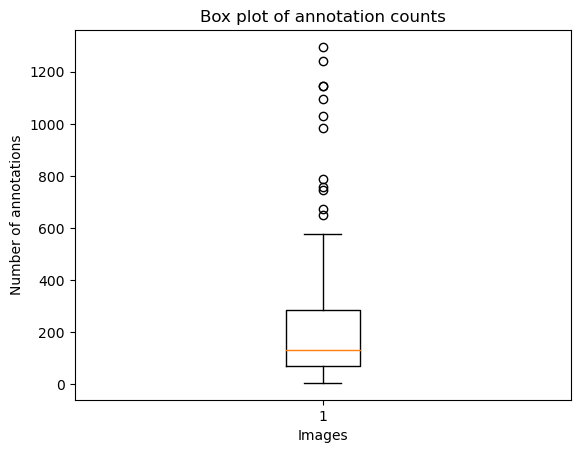

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('image_counts.csv')

# Create a boxplot of the counts
plt.boxplot(df['count'])
plt.xlabel('Images')
plt.ylabel('Number of annotations')
plt.title('Box plot of annotation counts')
plt.show()

In [73]:
# Create a dictionary to hold the counts for each image
image_counts = {}
rare_counts = {}

# Loop through the annotations and count the number of annotations for each image
for ann in data['annotations']:
    img_id = ann['image_id']
    cat_id = ann['category_id']
    if img_id not in image_counts:
        image_counts[img_id] = 0
        rare_counts[img_id] = {77: 0, 17: 0, 12: 0, 177: 0, 9: 0, 111: 0, 144: 0} #Ω,Δ,Κ,Λ,Π,Μ tous moins de 1300 occurences 
    image_counts[img_id] += 1
    if cat_id in rare_counts[img_id]:
        rare_counts[img_id][cat_id] += 1

    
sorted_images = sorted(image_counts.items(), key=lambda x: sum(rare_counts[x[0]].values()), reverse=True)

# Create a list of dictionaries to hold the results for each image
results = []
for img_id, total_count in sorted_images[:35]:
    img_name = os.path.split(next(img['file_name'] for img in data['images'] if img['id'] == img_id))[-1]
    rare_char_counts = rare_counts[img_id]
    rare_char_counts_str = ', '.join([f"{next(cat['name'] for cat in data['categories'] if cat['id'] == cat_id)} ({count})" for cat_id, count in rare_char_counts.items() if count > 0])
    results.append({'image_name': img_name, 'total_rare_char_count': sum(rare_counts[img_id].values()), 'rare_char_counts': rare_char_counts_str})

# Write the results to a CSV file
with open('top_35_images_with_most_rare_chars.csv', 'w', newline='') as csvfile:
    fieldnames = ['image_name', 'total_rare_char_count', 'rare_char_counts']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for result in results:
        writer.writerow(result)